# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

# Import the required packages

In [ ]:
from aitlas.datasets.semantic_segmentation import SemanticSegmentationDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

# Visualize images and masks

Total number of patches: 8000


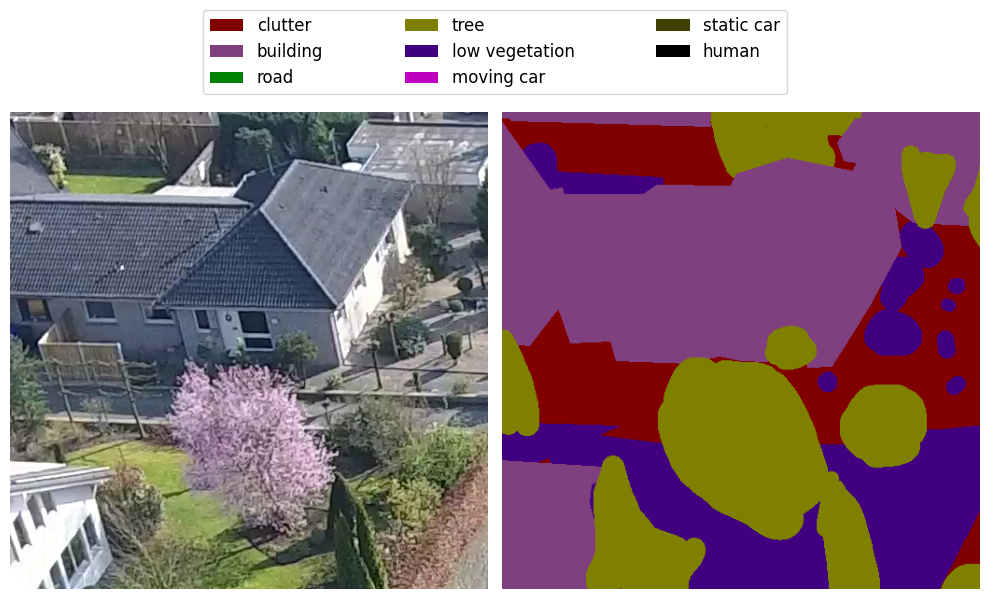

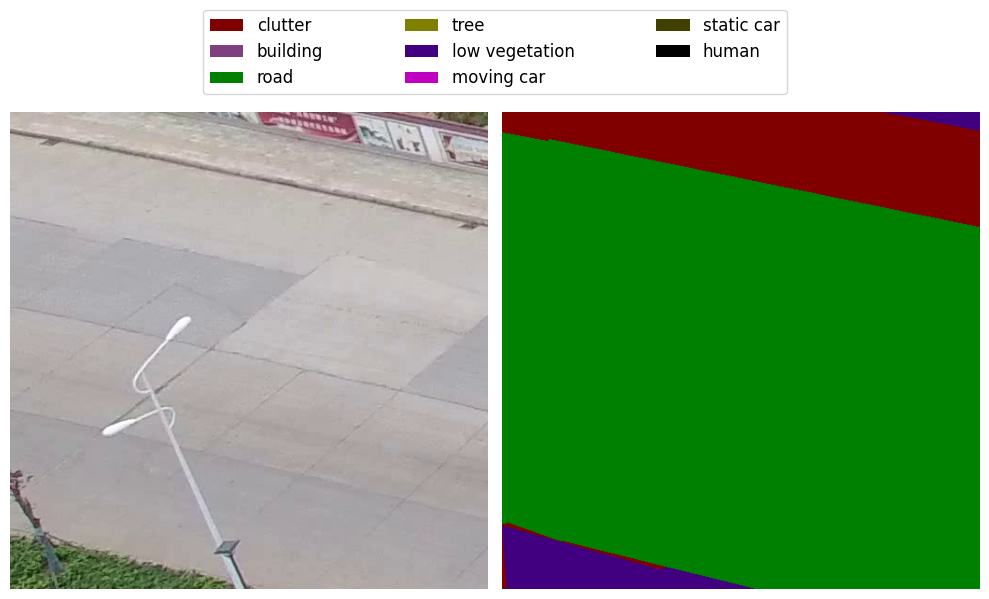

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/uavid/train"
}
dataset = UAVidDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(11);
dataset.show_image(26);

In [4]:
dataset.data_distribution_table()

,Number of pixels
clutter,378188480.0
building,560817600.0
road,286902432.0
tree,523453600.0
low vegetation,299681536.0
moving car,20640156.0
static car,25054600.0
human,2413557.0


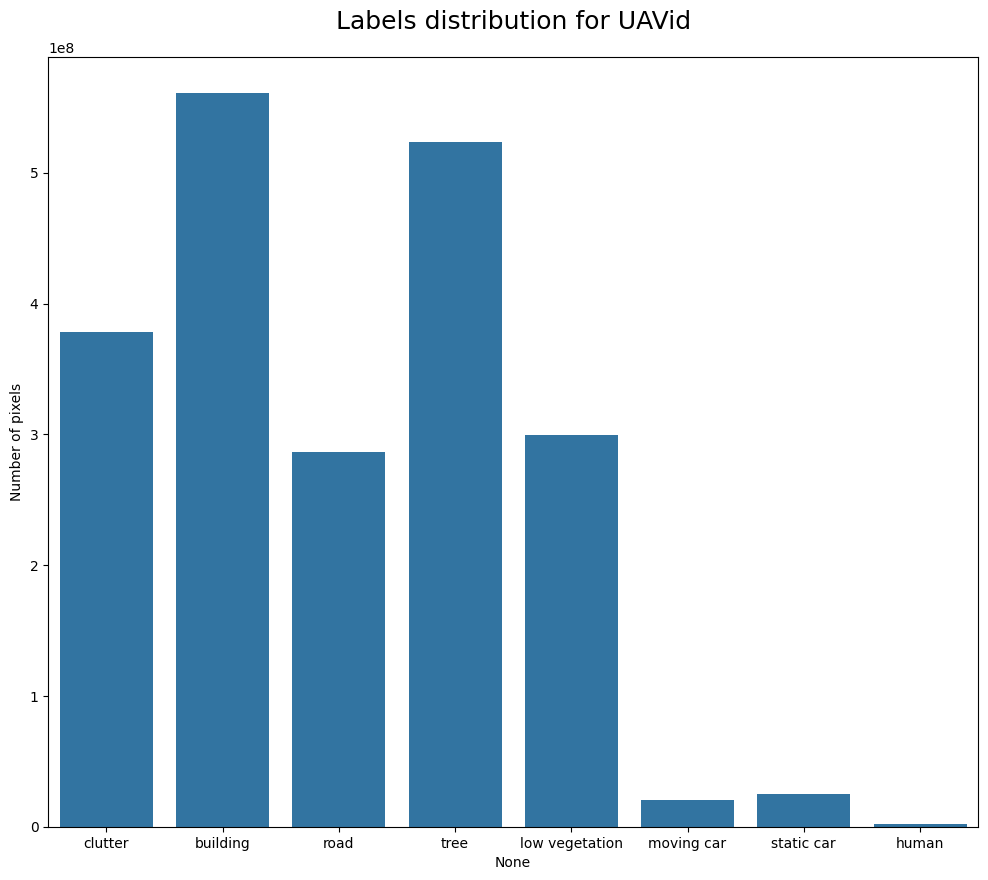

In [5]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/uavid/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = UAVidDataset(train_dataset_config)
len(train_dataset)

8000

## Create the model ##

In [4]:
epochs = 5
model_directory = "/home/dragik/data/semseg/uavid/experiments"
model_config = {
    "num_classes": 8, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:  10%|██████▉                                                                | 98/1000 [00:10<01:18, 11.55it/s]

[1, 100], loss:  0.69575


training:  20%|█████████████▊                                                        | 198/1000 [00:19<01:09, 11.60it/s]

[1, 200], loss:  0.58862


training:  30%|████████████████████▊                                                 | 298/1000 [00:27<01:00, 11.52it/s]

[1, 300], loss:  0.49577


training:  40%|███████████████████████████▊                                          | 398/1000 [00:36<00:52, 11.50it/s]

[1, 400], loss:  0.42655


training:  50%|██████████████████████████████████▊                                   | 498/1000 [00:45<00:43, 11.44it/s]

[1, 500], loss:  0.36659


training:  60%|█████████████████████████████████████████▊                            | 598/1000 [00:54<00:35, 11.45it/s]

[1, 600], loss:  0.32335


training:  70%|████████████████████████████████████████████████▊                     | 698/1000 [01:02<00:26, 11.42it/s]

[1, 700], loss:  0.29306


training:  80%|███████████████████████████████████████████████████████▊              | 798/1000 [01:11<00:17, 11.37it/s]

[1, 800], loss:  0.26957


training:  90%|██████████████████████████████████████████████████████████████▊       | 898/1000 [01:20<00:09, 11.32it/s]

[1, 900], loss:  0.25589


training: 100%|█████████████████████████████████████████████████████████████████████▊| 998/1000 [01:29<00:00, 11.31it/s]

[1, 1000], loss:  0.23109


training: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:29<00:00, 11.14it/s]

epoch: 1, time: 89, loss:  0.39463



testing on train set: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.11it/s]

IOU:0.733330577773353, IOU mean:0.4574286301740382, IOU per Class:[0.61773035 0.87606963 0.73587064 0.7696204  0.66013802 0.
 0.         0.        ]



training:  10%|███████                                                                | 99/1000 [00:09<01:18, 11.45it/s]

[2, 100], loss:  0.22643


training:  20%|█████████████▉                                                        | 199/1000 [00:18<01:14, 10.80it/s]

[2, 200], loss:  0.22255


training:  30%|████████████████████▉                                                 | 299/1000 [00:27<01:05, 10.74it/s]

[2, 300], loss:  0.20030


training:  40%|███████████████████████████▉                                          | 399/1000 [00:37<00:55, 10.75it/s]

[2, 400], loss:  0.19408


training:  50%|██████████████████████████████████▉                                   | 499/1000 [00:46<00:46, 10.78it/s]

[2, 500], loss:  0.18191


training:  60%|█████████████████████████████████████████▉                            | 599/1000 [00:55<00:37, 10.66it/s]

[2, 600], loss:  0.19267


training:  70%|████████████████████████████████████████████████▉                     | 699/1000 [01:05<00:28, 10.70it/s]

[2, 700], loss:  0.17701


training:  80%|███████████████████████████████████████████████████████▉              | 799/1000 [01:14<00:18, 10.73it/s]

[2, 800], loss:  0.18157


training:  90%|██████████████████████████████████████████████████████████████▉       | 899/1000 [01:23<00:09, 10.73it/s]

[2, 900], loss:  0.18396


training: 100%|█████████████████████████████████████████████████████████████████████▉| 999/1000 [01:32<00:00, 10.72it/s]

[2, 1000], loss:  0.17886


training: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:33<00:00, 10.73it/s]

epoch: 2, time: 93, loss:  0.19393



testing on train set: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 21.13it/s]

IOU:0.7779058935747414, IOU mean:0.4880125326058607, IOU per Class:[0.68692878 0.89643034 0.80452217 0.80230764 0.71391133 0.
 0.         0.        ]



training:  10%|███████                                                                | 99/1000 [00:09<01:21, 11.05it/s]

[3, 100], loss:  0.15934


training:  20%|█████████████▉                                                        | 199/1000 [00:18<01:12, 11.12it/s]

[3, 200], loss:  0.16008


training:  30%|████████████████████▉                                                 | 299/1000 [00:27<01:03, 11.04it/s]

[3, 300], loss:  0.14615


training:  40%|███████████████████████████▉                                          | 399/1000 [00:36<00:54, 11.10it/s]

[3, 400], loss:  0.16349


training:  50%|██████████████████████████████████▉                                   | 499/1000 [00:45<00:45, 11.08it/s]

[3, 500], loss:  0.14591


training:  60%|█████████████████████████████████████████▉                            | 599/1000 [00:54<00:36, 11.12it/s]

[3, 600], loss:  0.16516


training:  70%|████████████████████████████████████████████████▉                     | 699/1000 [01:03<00:27, 11.12it/s]

[3, 700], loss:  0.15087


training:  80%|███████████████████████████████████████████████████████▉              | 799/1000 [01:12<00:18, 11.10it/s]

[3, 800], loss:  0.14886


training:  90%|██████████████████████████████████████████████████████████████▉       | 899/1000 [01:21<00:09, 11.08it/s]

[3, 900], loss:  0.14822


training: 100%|█████████████████████████████████████████████████████████████████████▉| 999/1000 [01:30<00:00, 11.01it/s]

[3, 1000], loss:  0.14587


training: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:31<00:00, 10.97it/s]

epoch: 3, time: 91, loss:  0.15339



testing on train set: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.86it/s]

IOU:0.7921472642137165, IOU mean:0.49688629478395163, IOU per Class:[0.69844101 0.91822354 0.79709909 0.81820212 0.7431246  0.
 0.         0.        ]



training:  10%|███████                                                                | 99/1000 [00:09<01:18, 11.52it/s]

[4, 100], loss:  0.12907


training:  20%|█████████████▉                                                        | 199/1000 [00:18<01:09, 11.48it/s]

[4, 200], loss:  0.13829


training:  30%|████████████████████▉                                                 | 299/1000 [00:26<01:01, 11.49it/s]

[4, 300], loss:  0.13723


training:  40%|███████████████████████████▉                                          | 399/1000 [00:35<00:52, 11.47it/s]

[4, 400], loss:  0.14269


training:  50%|██████████████████████████████████▉                                   | 499/1000 [00:44<00:44, 11.28it/s]

[4, 500], loss:  0.14272


training:  60%|█████████████████████████████████████████▉                            | 599/1000 [00:53<00:35, 11.26it/s]

[4, 600], loss:  0.13122


training:  70%|████████████████████████████████████████████████▉                     | 699/1000 [01:01<00:26, 11.23it/s]

[4, 700], loss:  0.13709


training:  80%|███████████████████████████████████████████████████████▉              | 799/1000 [01:10<00:17, 11.26it/s]

[4, 800], loss:  0.13453


training:  90%|██████████████████████████████████████████████████████████████▉       | 899/1000 [01:19<00:08, 11.26it/s]

[4, 900], loss:  0.14539


training: 100%|█████████████████████████████████████████████████████████████████████▉| 999/1000 [01:28<00:00, 11.25it/s]

[4, 1000], loss:  0.13621


training: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.26it/s]

epoch: 4, time: 89, loss:  0.13744



testing on train set: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.79it/s]

IOU:0.8050058279258469, IOU mean:0.5059509020521682, IOU per Class:[0.72356838 0.92303155 0.81686356 0.82675515 0.75738859 0.
 0.         0.        ]



training:  10%|███████                                                                | 99/1000 [00:09<01:18, 11.51it/s]

[5, 100], loss:  0.12066


training:  20%|█████████████▉                                                        | 199/1000 [00:17<01:09, 11.47it/s]

[5, 200], loss:  0.11985


training:  30%|████████████████████▉                                                 | 299/1000 [00:26<01:01, 11.49it/s]

[5, 300], loss:  0.12188


training:  40%|███████████████████████████▉                                          | 399/1000 [00:35<00:52, 11.48it/s]

[5, 400], loss:  0.11784


training:  50%|██████████████████████████████████▉                                   | 499/1000 [00:44<00:44, 11.36it/s]

[5, 500], loss:  0.11770


training:  60%|█████████████████████████████████████████▉                            | 599/1000 [00:52<00:35, 11.35it/s]

[5, 600], loss:  0.11610


training:  70%|████████████████████████████████████████████████▉                     | 699/1000 [01:01<00:26, 11.38it/s]

[5, 700], loss:  0.11353


training:  80%|███████████████████████████████████████████████████████▉              | 799/1000 [01:10<00:17, 11.41it/s]

[5, 800], loss:  0.11628


training:  90%|██████████████████████████████████████████████████████████████▉       | 899/1000 [01:19<00:08, 11.36it/s]

[5, 900], loss:  0.12399


training: 100%|█████████████████████████████████████████████████████████████████████▉| 999/1000 [01:28<00:00, 11.37it/s]

[5, 1000], loss:  0.12302


training: 100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [01:28<00:00, 11.29it/s]

epoch: 5, time: 88, loss:  0.11909



testing on train set: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:47<00:00, 20.91it/s]

IOU:0.8209110624166216, IOU mean:0.517288870178044, IOU per Class:[0.76156613 0.92706798 0.84534371 0.83298729 0.77134585 0.
 0.         0.        ]


Train loss: [0.18789650779962538, 0.13529823273420333, 0.12216926652193069, 0.11124151849746704, 0.10119014549255372]
Validation loss: []
Train time per epochs: [89, 93, 91, 89, 88]
Finished training. training time: 450


## Evaluate the model ##

In [7]:
test_dataset_config = {
    "batch_size": 8,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/uavid/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}

test_dataset = UAVidDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Loading checkpoint /home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar at epoch 6


testing on test set: 100%|████████████████████████████████████████████████████████████| 350/350 [00:17<00:00, 20.02it/s]


[{'IOU': 0.7205989917073968,
  'IOU mean': 0.4423536824694457,
  'IOU per Class': array([0.57240173, 0.87635423, 0.69697354, 0.73984983, 0.65325014,
         0.        , 0.        , 0.        ])}]

## Predictions ##

Loading checkpoint /home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar at epoch 6


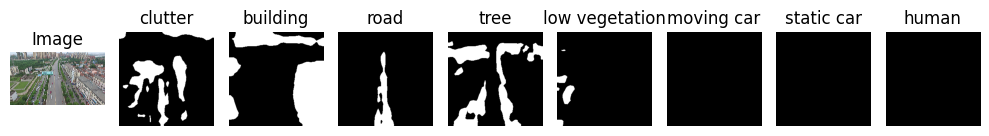

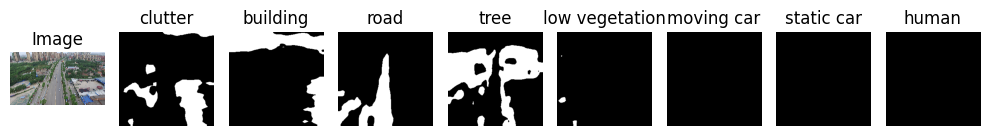

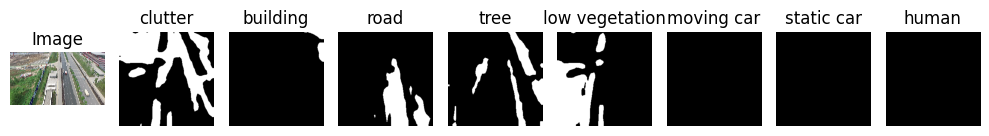

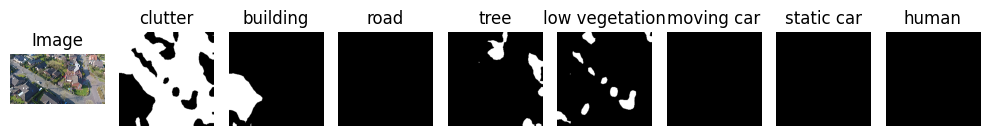

In [10]:
model_path = "/home/dragik/data/semseg/uavid/experiments/checkpoint.pth.tar"
labels = ["clutter","building","road","tree","low vegetation","moving car","static car","human"]
transform = ResizeToTensor()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/uavid/test/images/seq21_000100.png')
fig = model.predict_masks(image, labels, transform)
image = image_loader('/home/dragik/data/semseg/uavid/test/images/seq21_000700.png')
fig = model.predict_masks(image, labels, transform)
image = image_loader('/home/dragik/data/semseg/uavid/test/images/seq26_000100.png')
fig = model.predict_masks(image, labels, transform)
image = image_loader('/home/dragik/data/semseg/uavid/test/images/seq38_000000.png')
fig = model.predict_masks(image, labels, transform)